In [84]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [85]:
filepath = "./DC_Properties.csv"

DC_Properties_df = pd.read_csv(filepath)
DC_Properties_df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [86]:
DC_Properties_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

In [88]:
DC_Properties_df_no_missing = DC_Properties_df[pd.notnull(DC_Properties_df['PRICE'])]
DC_Properties_df_no_missing

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
14,14,3,1,Warm Cool,Y,2.0,5,3,1917.0,2000.0,...,-77.039716,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
16,16,3,1,Warm Cool,Y,1.0,8,3,1908.0,2006.0,...,-77.039844,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
19,19,3,1,Hot Water Rad,Y,2.0,9,3,1908.0,2013.0,...,-77.040138,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
20,20,3,1,Hot Water Rad,Y,1.0,14,5,1880.0,2009.0,...,-77.033774,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,-77.033366,38.911716,NW


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB0EEC4908>,
      dtype=object)

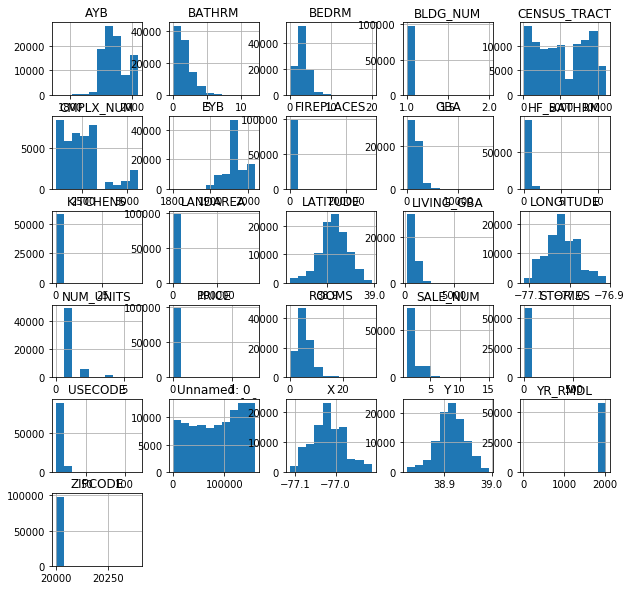

In [92]:
#plot the frequency count for each column
DC_Properties_df_no_missing.hist(figsize=(10,10))

In [95]:
DC_Properties_df_no_missing['PRICE'].head()

0    1095000.0
2    2100000.0
3    1602000.0
5    1950000.0
7    1050000.0
Name: PRICE, dtype: float64

In [74]:
DC_Properties_df.drop

<bound method DataFrame.drop of         Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  \
0                0       4          0      Warm Cool  Y        2.0      8   
1                1       3          1      Warm Cool  Y        2.0     11   
2                2       3          1  Hot Water Rad  Y        2.0      9   
3                3       3          1  Hot Water Rad  Y        2.0      8   
4                4       2          1      Warm Cool  Y        1.0     11   
5                5       3          2  Hot Water Rad  Y        1.0     10   
6                6       1          0      Warm Cool  Y        2.0      5   
7                7       3          1  Hot Water Rad  Y        2.0      8   
8                8       3          1      Warm Cool  Y        2.0      7   
9                9       1          1  Hot Water Rad  Y        1.0      6   
10              10       3          0     Forced Air  N        3.0     12   
11              11       5          0  Hot W

In [76]:
DC_Properties_df_no_missing = DC_Properties_df[pd.notnull(DC_Properties_df['PRICE'])]
DC_Properties_df_no_missing

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
14,14,3,1,Warm Cool,Y,2.0,5,3,1917.0,2000.0,...,-77.039716,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
16,16,3,1,Warm Cool,Y,1.0,8,3,1908.0,2006.0,...,-77.039844,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
19,19,3,1,Hot Water Rad,Y,2.0,9,3,1908.0,2013.0,...,-77.040138,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
20,20,3,1,Hot Water Rad,Y,1.0,14,5,1880.0,2009.0,...,-77.033774,Old City 2,040 E Old City 2,5201.0,005201 4003,Ward 2,208,-77.033366,38.911716,NW


In [91]:
DC_Properties_df_no_missing.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,98216.000000,98216.000000,98216.000000,57900.000000,98216.000000,98216.000000,98104.000000,57674.000000,98216.000000,57867.000000,...,98216.000000,98216.000000,40316.000000,40316.000000,98216.000000,98216.000000,98216.000000,98216.000000,98115.000000,98115.000000
mean,85324.149802,1.859157,0.444541,1.221071,5.921836,2.606480,1944.903888,2000.666748,1965.759876,2.124667,...,14.613393,2084.296123,2442.438337,882.090907,20012.303525,38.913911,-77.018076,5289.710220,-77.018101,38.913903
std,47633.750491,0.978321,0.576217,0.623997,2.637816,1.393801,36.254098,16.136807,27.500116,3.948764,...,3.683449,2765.429658,1136.998556,406.013673,16.326982,0.030185,0.039794,3288.288804,0.039786,0.030161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,199.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,43005.500000,1.000000,0.000000,1.000000,4.000000,2.000000,1917.000000,1991.000000,1954.000000,2.000000,...,11.000000,482.000000,1586.750000,619.000000,20005.000000,38.895973,-77.042758,2201.000000,-77.042768,38.895753
50%,89420.500000,2.000000,0.000000,1.000000,6.000000,3.000000,1939.000000,2005.000000,1965.000000,2.000000,...,13.000000,1380.000000,2282.000000,781.000000,20010.000000,38.914207,-77.021489,5002.000000,-77.021262,38.914181
75%,128346.500000,2.000000,1.000000,1.000000,7.000000,3.000000,1966.000000,2011.000000,1981.000000,2.000000,...,17.000000,2556.000000,2972.000000,1049.000000,20017.000000,38.933797,-76.990601,8100.000000,-76.990849,38.933756
max,158955.000000,12.000000,11.000000,6.000000,31.000000,20.000000,2018.000000,2019.000000,2018.000000,826.000000,...,117.000000,187301.000000,5621.000000,8553.000000,20392.000000,38.995435,-76.909758,11100.000000,-76.910511,38.993646


In [99]:
#Method 1: manual calculation of z-scores for 'PRICE'column

#mean for the column
mean = DC_Properties_df_no_missing['PRICE'].mean()

#standard deviation of the column
std =DC_Properties_df_no_missing['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
price_z_manual = (DC_Properties_df_no_missing['PRICE'] - mean)/std

In [107]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'price' is in double set of square brackets in order to make it a dataframe
Price_zscore = scaler.fit_transform(DC_Properties_no_missing[['PRICE']])

NameError: name 'DC_Properties_no_missing' is not defined

In [77]:
DC_Properties_df['PRICE'].mean()

931351.5949336156

In [90]:
#check if any missing values in the data
DC_Properties_df.count()

Unnamed: 0            158957
BATHRM                158957
HF_BATHRM             158957
HEAT                  158957
AC                    158957
NUM_UNITS             106696
ROOMS                 158957
BEDRM                 158957
AYB                   158686
YR_RMDL                80928
EYB                   158957
STORIES               106652
SALEDATE              132187
PRICE                  98216
QUALIFIED             158957
SALE_NUM              158957
GBA                   106696
BLDG_NUM              158957
STYLE                 106696
STRUCT                106696
GRADE                 106696
CNDTN                 106696
EXTWALL               106696
ROOF                  106696
INTWALL               106696
KITCHENS              106695
FIREPLACES            158957
USECODE               158957
LANDAREA              158957
GIS_LAST_MOD_DTTM     158957
SOURCE                158957
CMPLX_NUM              52261
LIVING_GBA             52261
FULLADDRESS           106040
CITY          

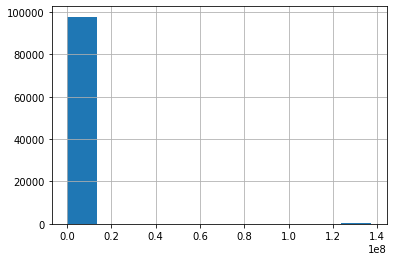

In [102]:
#BEFORE: frequency count plot of 'Glucose' column
DC_Properties_df_no_missing['PRICE'].hist()